# Multi-Model Ensemble for Noisy Data Classification  
## Machine Learning Assignment Project

**Course:** Machine Learning  
**Program:** Bachelor of Artificial Intelligence  

**Student Name:** Hina Nadeem  
        
**Roll No:** 23-AI-25
---

### Project Description
This project focuses on solving a real-world noisy data classification problem using multiple
machine learning techniques. The dataset contains missing values, noise, and irrelevant
features, which are handled through appropriate preprocessing methods such as imputation
and feature scaling.

Three supervised learning models—Decision Tree, Naive Bayes, and Support Vector Machine
(SVM)—are trained and evaluated using cross-validation. To further enhance performance,
ensemble learning (Bagging) is applied to reduce overfitting and improve generalization.

The project demonstrates practical model comparison, performance evaluation using
classification metrics, and the effectiveness of ensemble methods when dealing with noisy
real-world data.


#Import Required Libraries

In [1]:

# NumPy and Pandas are used for numerical operations and data handling
import numpy as np
import pandas as pd

# Matplotlib is used for data visualization
import matplotlib.pyplot as plt

# Scikit-learn utilities for datasets, preprocessing, and evaluation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Supervised Machine Learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ensemble learning technique
from sklearn.ensemble import BaggingClassifier

# Performance evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#Load Real-World Dataset

In [2]:

# Breast Cancer dataset is a widely used real-world medical dataset
data = load_breast_cancer()

# Convert the dataset into a Pandas DataFrame for easier processing
X = pd.DataFrame(data.data, columns=data.feature_names)

# Target variable (0 = malignant, 1 = benign)
y = data.target


Explanation:

A real-world dataset is loaded and converted into DataFrame format to simplify preprocessing and analysis.

#Introduce Noise and Missing Values

In [3]:

# Set random seed for reproducibility
np.random.seed(42)

# Randomly make 5% of the dataset values missing
mask = np.random.rand(*X.shape) < 0.05

# Apply mask to introduce missing values
X = X.mask(mask)

# Display the first few rows
X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,NaN,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,NaN,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,NaN,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,NaN,0.4000,0.1625,0.2364,0.07678


 Explanation:

This cell simulates real-world noisy data by introducing missing values into the dataset.

#Data Preprocessing Pipeline

In [4]:

# Step 1: Handle missing values using mean imputation
# Step 2: Standardize features so all features have equal scale
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


Explanation:

The preprocessing pipeline ensures missing values are handled and features are normalized for fair model comparison.

#Train-Test Split

In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 80% training and 20% testing
    random_state=42,
    stratify=y            # Maintain class distribution
)

# Apply preprocessing to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


 Explanation:

The dataset is split into training and testing sets, and preprocessing is applied correctly to avoid data leakage.

#Model Definitions

In [7]:

# Decision Tree with pruning to reduce overfitting
decision_tree = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

# Naive Bayes classifier
naive_bayes = GaussianNB()

# Support Vector Machine with regularization
svm = SVC(
    kernel='rbf',
    C=1.0,              # Regularization parameter
    gamma='scale'
)

# Store models in a dictionary
models = {
    "Decision Tree": decision_tree,
    "Naive Bayes": naive_bayes,
    "SVM": svm
}


Explanation:

Three supervised learning models are defined. Pruning and regularization are applied to control overfitting.

#Cross-Validation and Model Evaluation

In [9]:

results = {}

for name, model in models.items():

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(
        model,
        X_train_processed,
        y_train,
        cv=5
    )

    # Train the model on training data
    model.fit(X_train_processed, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test_processed)

    # Calculate evaluation metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "CV Mean Accuracy": cv_scores.mean()
    }

# Display results in tabular form
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1 Score,CV Mean Accuracy
Decision Tree,0.938596,0.945205,0.958333,0.951724,0.920879
Naive Bayes,0.929825,0.944444,0.944444,0.944444,0.929670
SVM,0.982456,0.986111,0.986111,0.986111,0.973626


Explanation:

Each model is trained and evaluated using cross-validation and standard classification metrics.

#Ensemble Learning (Bagging)

In [10]:

# Create a Bagging classifier using Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

# Train the ensemble model
bagging_model.fit(X_train_processed, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = bagging_model.predict(X_test_processed)

# Calculate ensemble performance metrics
ensemble_results = {
    "Accuracy": accuracy_score(y_test, y_pred_ensemble),
    "Precision": precision_score(y_test, y_pred_ensemble),
    "Recall": recall_score(y_test, y_pred_ensemble),
    "F1 Score": f1_score(y_test, y_pred_ensemble)
}

ensemble_results


{'Accuracy': 0.9298245614035088,
 'Precision': 0.9444444444444444,
 'Recall': 0.9444444444444444,
 'F1 Score': 0.9444444444444444}

Explanation:

Bagging combines multiple decision trees to reduce variance and improve performance on noisy data.

#Confusion Matrix

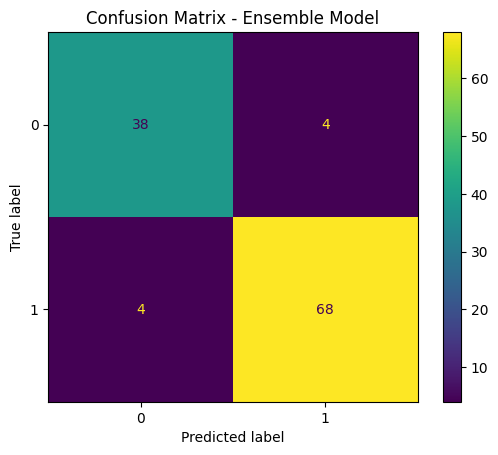

In [11]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Ensemble Model")
plt.show()


Explanation:

The confusion matrix visually represents the classification performance of the ensemble model.

#Final Observations

- Noisy data negatively impacts model performance, especially Decision Trees.
- Pruning and regularization effectively reduce overfitting.
- SVM performs well due to margin maximization and regularization.
- Ensemble learning improves generalization by combining multiple models.